In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency

In [25]:
df = pd.read_csv('FMCG_2022_2024.csv')

In [26]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [27]:
df = df[~((df['date'].dt.year == 2024) & 
          ((df['date'].dt.month == 11) | (df['date'].dt.month == 12)))
       ].reset_index(drop=True)


In [28]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176778,2024-10-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,8.70,0,1,176,162,24
176779,2024-10-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Carton,3.22,0,2,149,196,19
176780,2024-10-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Carton,4.70,0,5,99,125,9
176781,2024-10-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Carton,6.44,0,5,149,180,12


In [29]:
missing_values = df.isnull().sum()
print(missing_values)

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64


In [30]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [31]:
#convert the promotion_flag column to categorical one means yes and zero means no
df['promotion_flag'] = df['promotion_flag'].map({1: 'yes', 0: 'no'})
df['promotion_flag'] = df['promotion_flag'].astype('category')

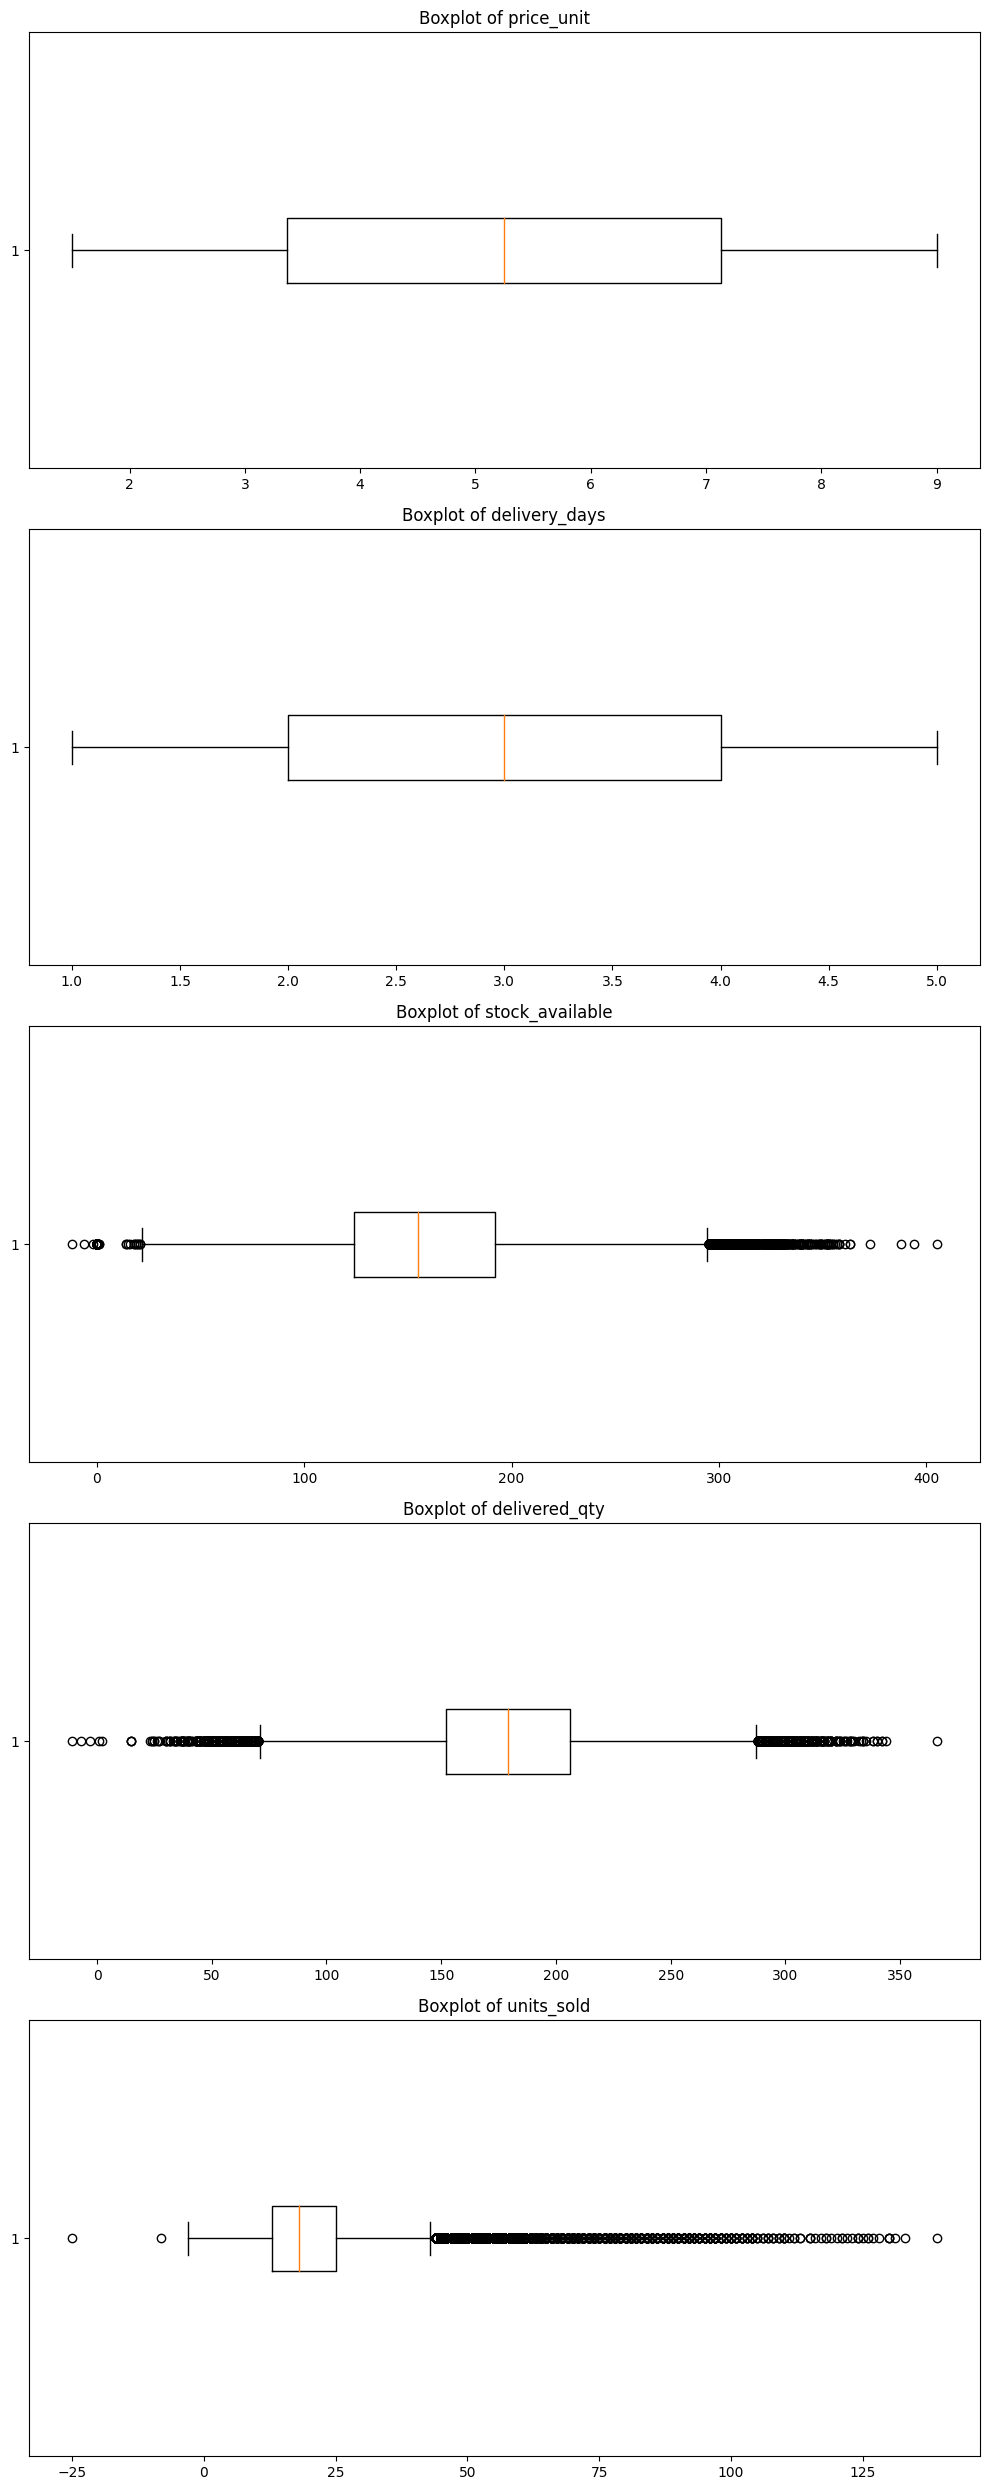

In [32]:


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

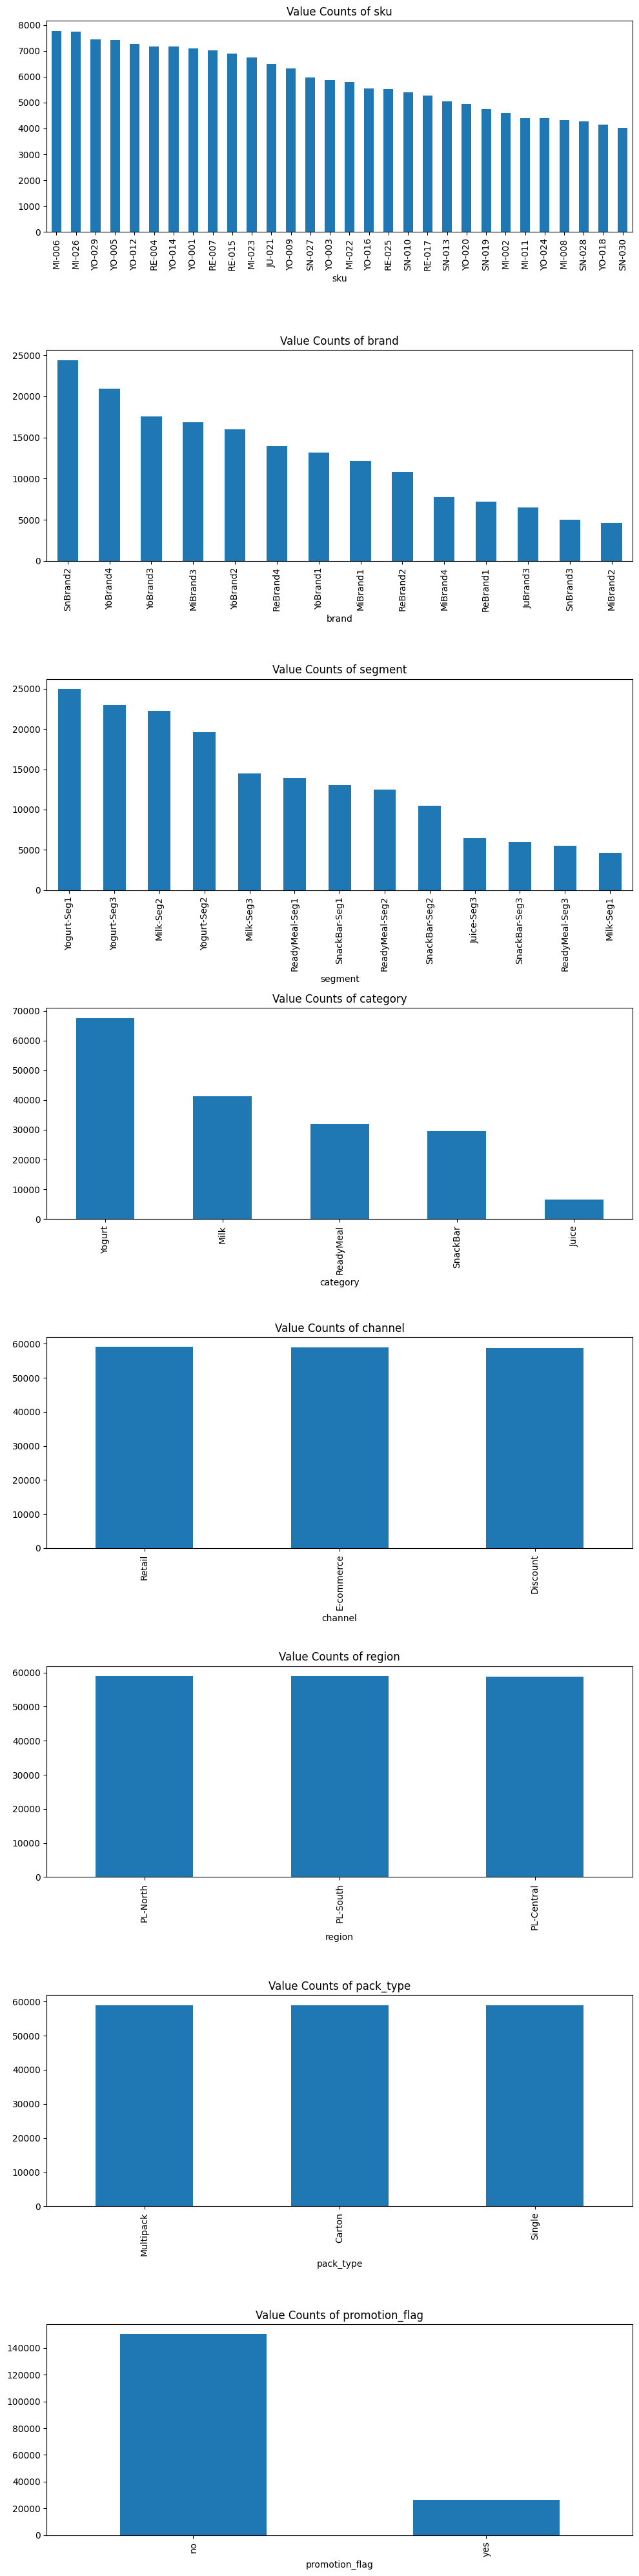

In [33]:
#i want to plot the value counts of all categorical columns in the dataframe
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols):  
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Value Counts of {col}')
plt.tight_layout()
plt.show()

In [34]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = in(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage
cramers_v(df['brand'], df['category'])


SyntaxError: invalid syntax (703542846.py, line 3)

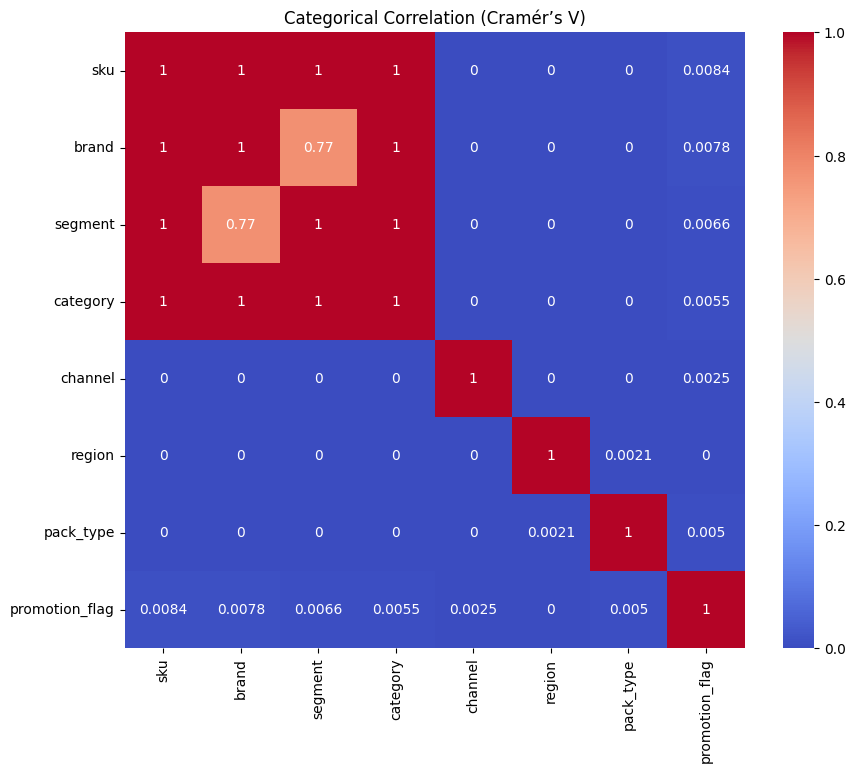

In [ ]:
#promotion flag could be a problem due to unequal distribution also a lot yougurt in category and sub category
#i want to see the correlation between the categorial columns and the target column
cat_cols = ['sku','brand','segment','category','channel','region','pack_type','promotion_flag']

matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            matrix.loc[col1,col2] = 1.0
        else:
            matrix.loc[col1,col2] = cramers_v(df[col1], df[col2])

matrix = matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Categorical Correlation (Cramér’s V)")
plt.show()


Text(0.5, 1.0, 'Numerical Correlation (Pearson)')

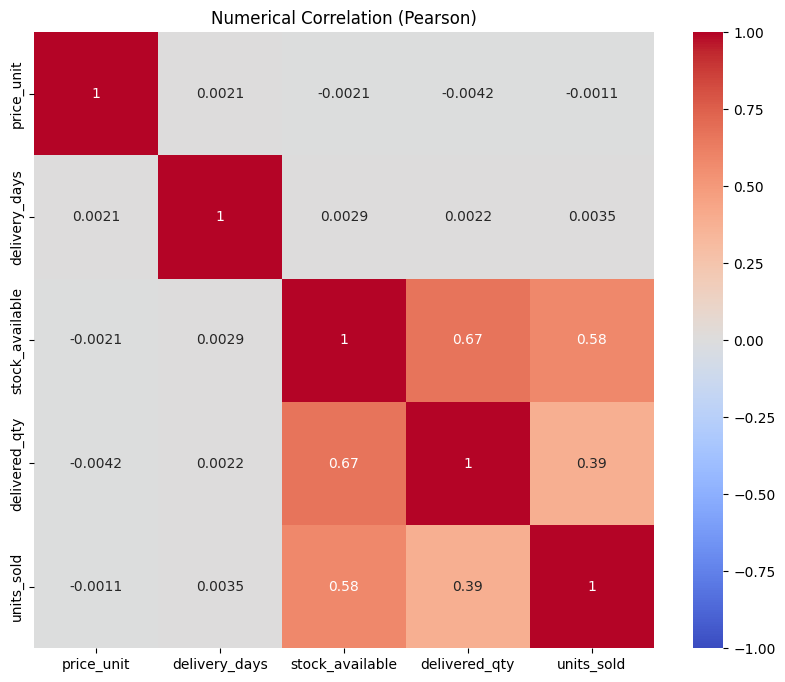

In [ ]:
df[['price_unit','delivery_days','stock_available','delivered_qty','units_sold']].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(df[['price_unit','delivery_days','stock_available','delivered_qty','units_sold']].corr(method='pearson'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Numerical Correlation (Pearson)")

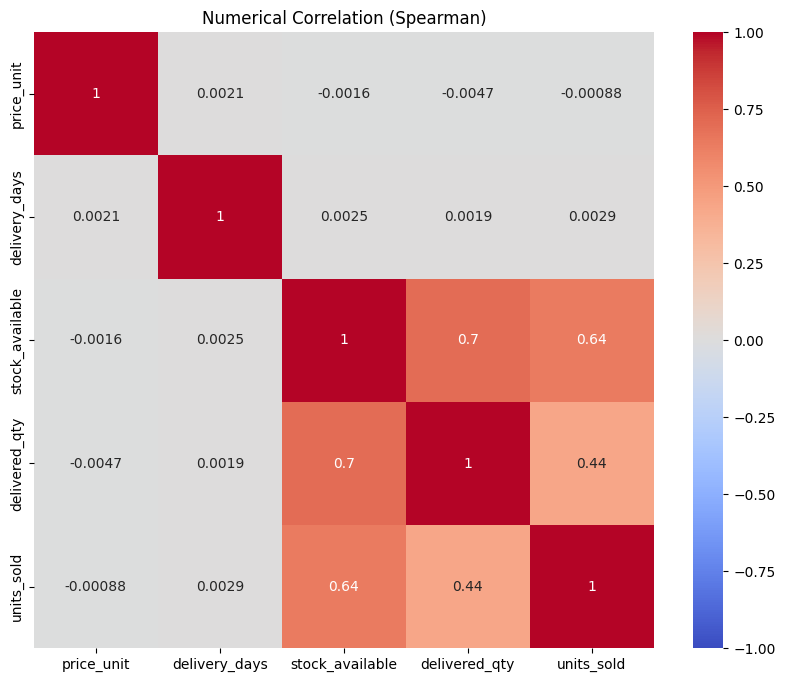

In [ ]:
df[['price_unit','delivery_days','stock_available','delivered_qty','units_sold']].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(df[['price_unit','delivery_days','stock_available','delivered_qty','units_sold']].corr(method='spearman'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)    
plt.title("Numerical Correlation (Spearman)")
plt.show()

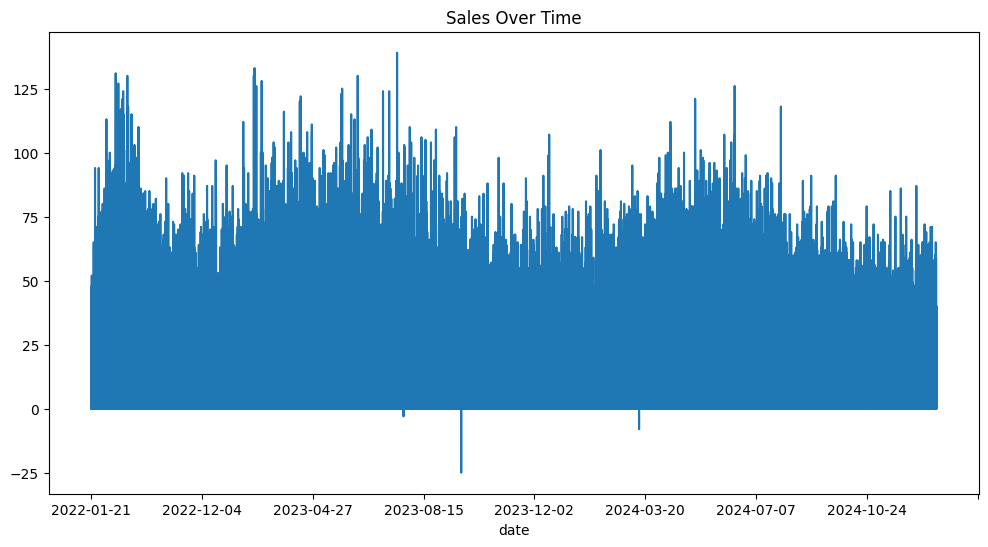

In [ ]:
# Assuming df has 'date' and 'units_sold'
df1 = df.copy()
df1 = df1.set_index('date')

df1['units_sold'].plot(figsize=(12,6))
plt.title("Sales Over Time")
plt.show()



Analyzing: brand vs units_sold

Grouped statistics:
               mean  median     sum  count
brand                                     
YoBrand2  22.218975    19.0  385477  17349
YoBrand1  21.888193    19.0  307748  14060
YoBrand3  21.151573    18.0  401478  18981
YoBrand4  21.144374    18.0  471879  22317
SnBrand2  20.314286    18.0  543915  26775

ANOVA Test → F=300.394, p=0.00000

Mutual Information Score: 0.0160


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)


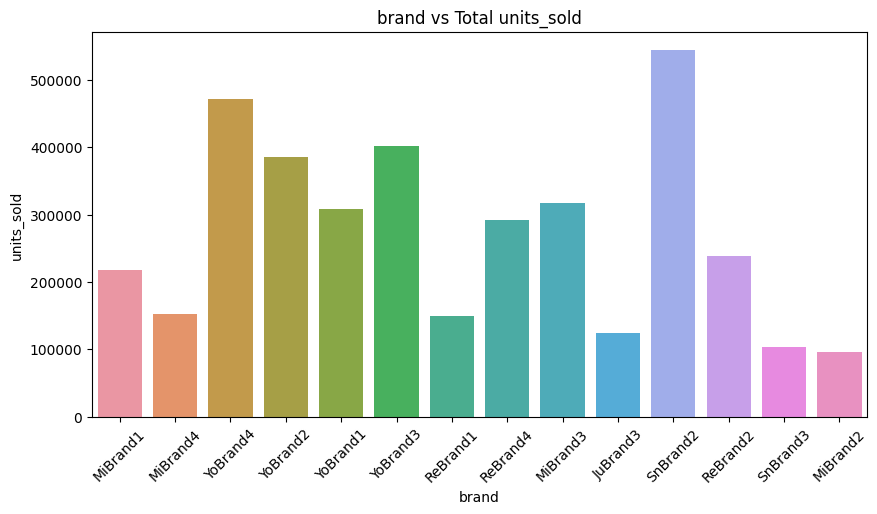


Analyzing: segment vs units_sold

Grouped statistics:
                     mean  median     sum  count
segment                                         
Yogurt-Seg2     22.343946    19.0  470206  21044
Yogurt-Seg3     21.301628    19.0  528536  24812
SnackBar-Seg1   21.218383    19.0  307030  14470
Yogurt-Seg1     21.147816    19.0  567840  26851
ReadyMeal-Seg3  20.314524    18.0  121684   5990

ANOVA Test → F=339.228, p=0.00000

Mutual Information Score: 0.0164


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)


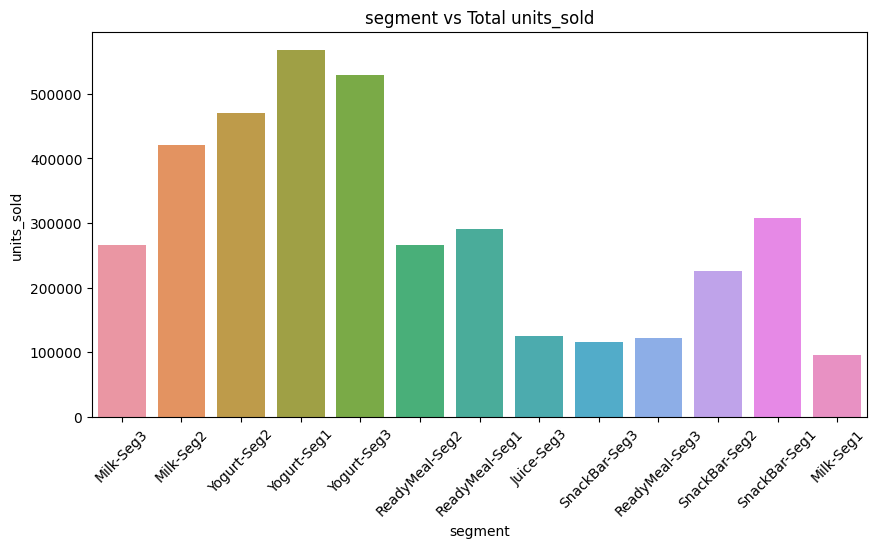


Analyzing: category vs units_sold

Grouped statistics:
                mean  median      sum  count
category                                    
Yogurt     21.546509    19.0  1566582  72707
SnackBar   20.055924    18.0   647325  32276
ReadyMeal  19.828076    18.0   678834  34236
Juice      17.909981    16.0   124349   6943
Milk       17.552057    15.0   782734  44595

ANOVA Test → F=866.002, p=0.00000

Mutual Information Score: 0.0160


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)


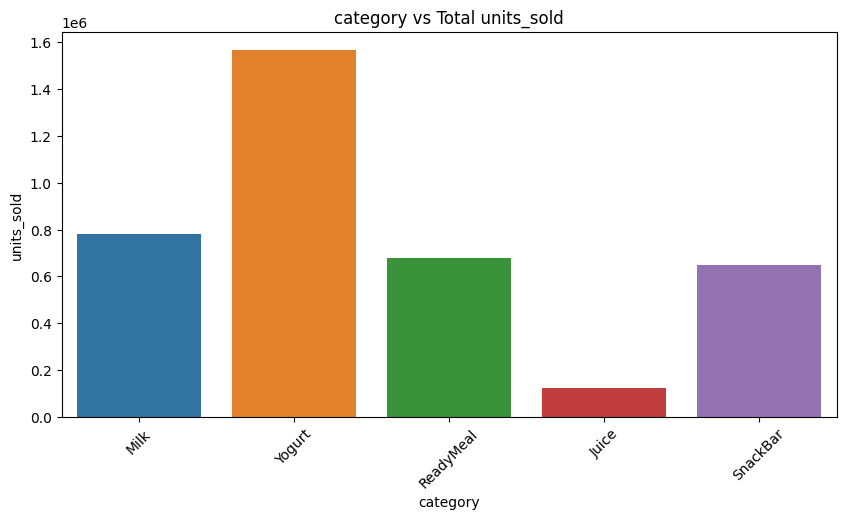


Analyzing: channel vs units_sold

Grouped statistics:
                 mean  median      sum  count
channel                                      
E-commerce  19.942753    18.0  1268738  63619
Discount    19.917888    18.0  1263790  63450
Retail      19.898505    18.0  1267296  63688

ANOVA Test → F=0.226, p=0.79769

Mutual Information Score: 0.0018


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)


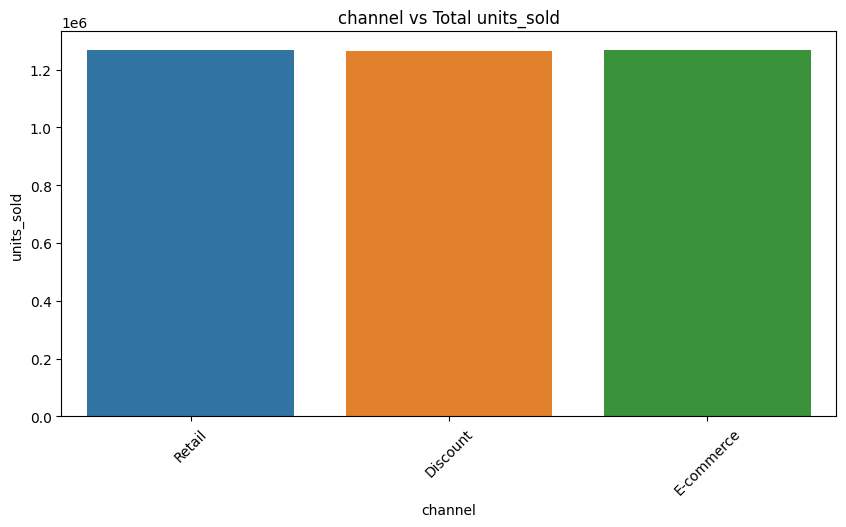


Analyzing: region vs units_sold

Grouped statistics:
                 mean  median      sum  count
region                                       
PL-North    19.959494    18.0  1270322  63645
PL-South    19.941039    18.0  1267592  63567
PL-Central  19.858525    17.0  1261910  63545

ANOVA Test → F=1.327, p=0.26540

Mutual Information Score: 0.0000


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)


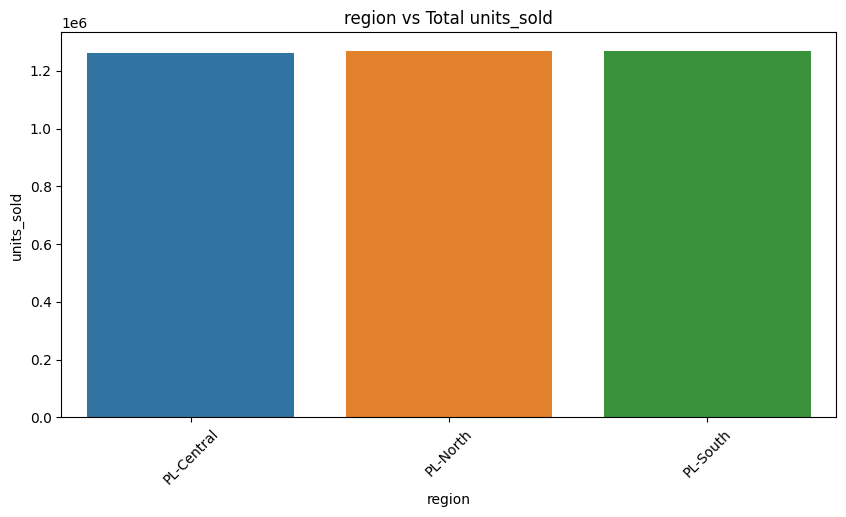


Analyzing: pack_type vs units_sold

Grouped statistics:
                mean  median      sum  count
pack_type                                   
Single     19.991438    18.0  1270176  63536
Carton     19.895101    18.0  1266741  63671
Multipack  19.872651    17.0  1262907  63550

ANOVA Test → F=1.827, p=0.16091

Mutual Information Score: 0.0000


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)


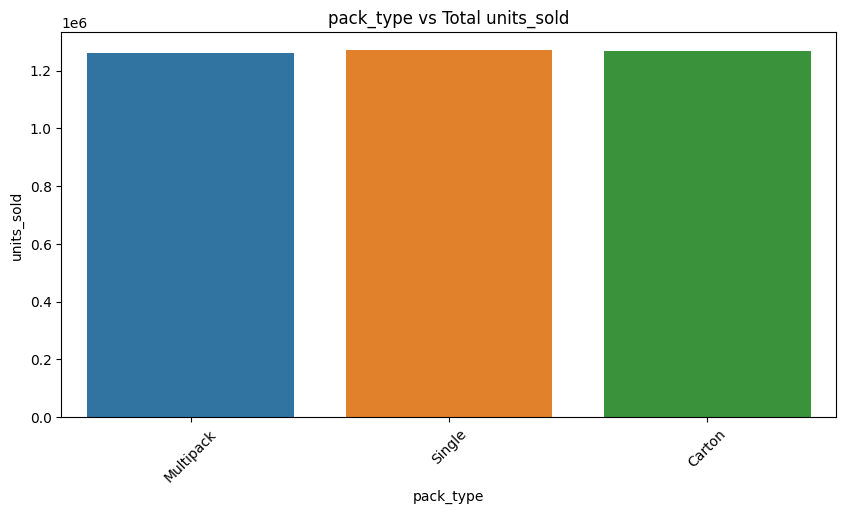


Analyzing: promotion_flag vs units_sold

Grouped statistics:
                     mean  median      sum   count
promotion_flag                                    
yes             34.060574    31.0   969398   28461
no              17.439900    16.0  2830426  162296

ANOVA Test → F=64649.767, p=0.00000


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(col)[target_col].agg(['mean','median','sum','count']).sort_values('mean', ascending=False)
C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target_col].values for name, group in df.groupby(col)]



Mutual Information Score: 0.1200


C:\Users\asrah\AppData\Local\Temp\ipykernel_6956\3185346211.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)
C:\Users\asrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


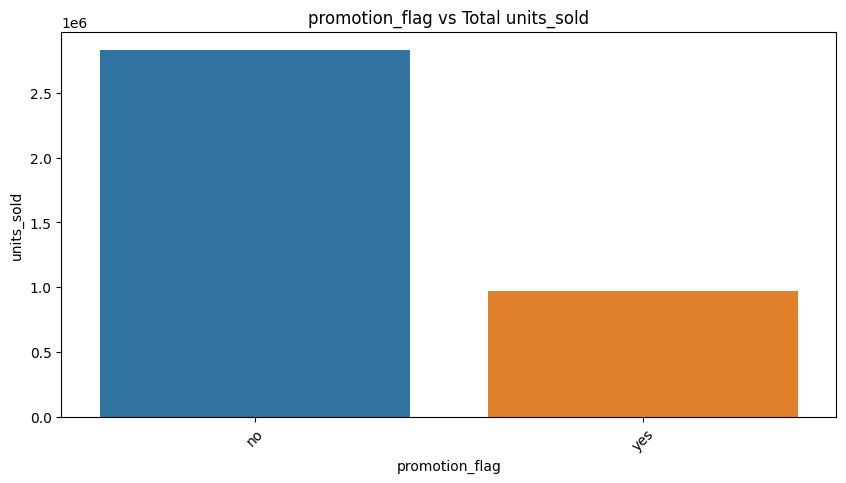

In [ ]:

def analyze_categorical_vs_target(df, cat_cols, target_col):
    report = {}

    for col in cat_cols:
        print(f"\n{'='*40}\nAnalyzing: {col} vs {target_col}\n{'='*40}")
        
        # 1. Grouped statistics
        stats = df.groupby(col)[target_col].agg(['mean','median','sum','count']).sort_values('mean', ascending=False)
        print("\nGrouped statistics:")
        print(stats.head())

        # 2. ANOVA / Kruskal significance test
        groups = [group[target_col].values for name, group in df.groupby(col)]
        if len(groups) > 1:
            try:
                f_stat, p_val = f_oneway(*groups)
                print(f"\nANOVA Test → F={f_stat:.3f}, p={p_val:.5f}")
            except:
                h_stat, p_val = kruskal(*groups)
                print(f"\nKruskal-Wallis Test → H={h_stat:.3f}, p={p_val:.5f}")

        # 3. Mutual Information
        le = LabelEncoder()
        encoded = le.fit_transform(df[col].astype(str))
        mi = mutual_info_regression(encoded.reshape(-1,1), df[target_col])[0]
        print(f"\nMutual Information Score: {mi:.4f}")

        # 4. Visualization
        plt.figure(figsize=(10,5))
        if df[col].nunique() <= 20:   # barplot for few categories
            sns.barplot(x=col, y=target_col, data=df, estimator=sum, ci=None)
            plt.title(f"{col} vs Total {target_col}")
            plt.xticks(rotation=45)
        else:   # boxplot for many categories
            sns.boxplot(x=col, y=target_col, data=df)
            plt.title(f"{col} vs {target_col} Distribution")
            plt.xticks([])
        plt.show()

        # Save report
        report[col] = {
            "stats": stats,
            "mutual_info": mi
        }

    return report

# Example usage:
cat_cols = ['brand','segment','category','channel','region','pack_type','promotion_flag']
report = analyze_categorical_vs_target(df, cat_cols, target_col='units_sold')


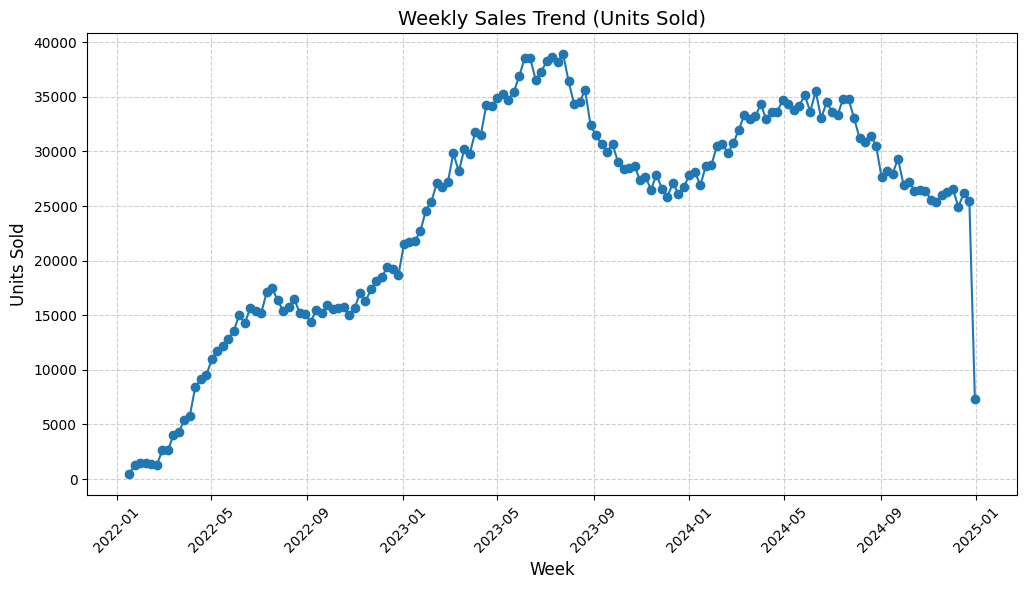

In [ ]:


# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Create week column (week start date, Monday by default)
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate weekly sales
weekly_sales = df.groupby('week')['units_sold'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(weekly_sales['week'], weekly_sales['units_sold'], marker='o')

plt.title("Weekly Sales Trend (Units Sold)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)

plt.show()


In [ ]:
df_eda = df.copy()

<Axes: title={'center': 'Entries per Day'}, xlabel='date'>

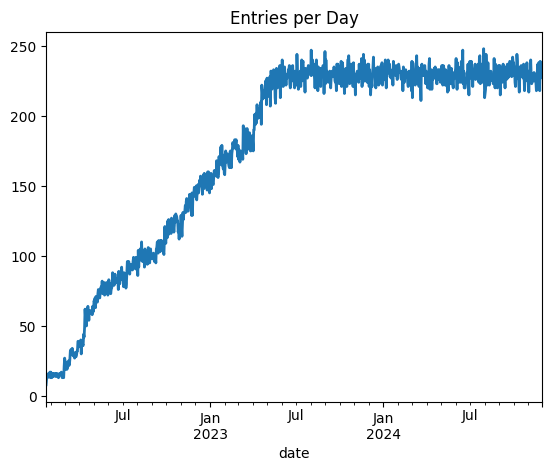

In [ ]:
df_eda["date"].value_counts().sort_index().plot(title="Entries per Day", lw=2)


In [ ]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,no,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,yes,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,no,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,no,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,no,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183644,2024-11-30,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Carton,7.79,no,5,133,153,15
183645,2024-11-30,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,3.12,no,4,127,122,10
183646,2024-11-30,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Carton,2.16,no,1,112,146,18
183647,2024-11-30,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Single,7.53,no,2,208,252,27


In [ ]:
# Remove rows with any negative values in those columns
df = df[(df[["units_sold", "stock_available", "delivered_qty", "delivery_days"]] >= 0).all(axis=1)].copy()
df = df.sort_values(["sku", "date"]).reset_index(drop=True)
initial_rows = df_eda.shape[0]
final_rows = df.shape[0]
print(f"Rows removed due to negative values: {initial_rows - final_rows}")

Rows removed due to negative values: 3


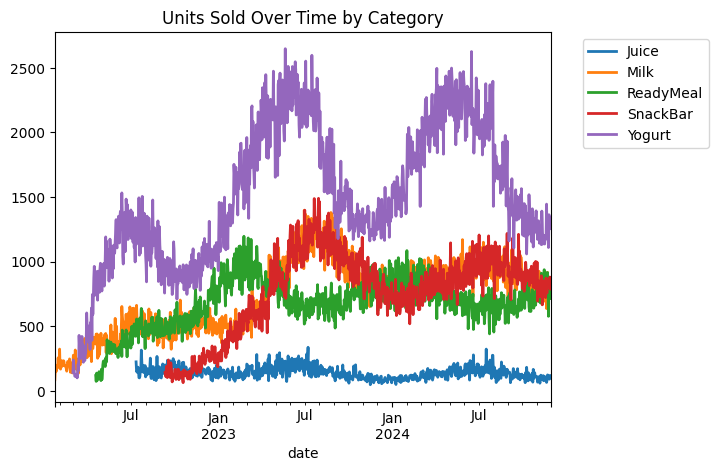

In [ ]:
# Time trends by category
df_cat_trend = df_eda.groupby(["date", "category"])["units_sold"].sum().unstack()
df_cat_trend.plot(title="Units Sold Over Time by Category", lw=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

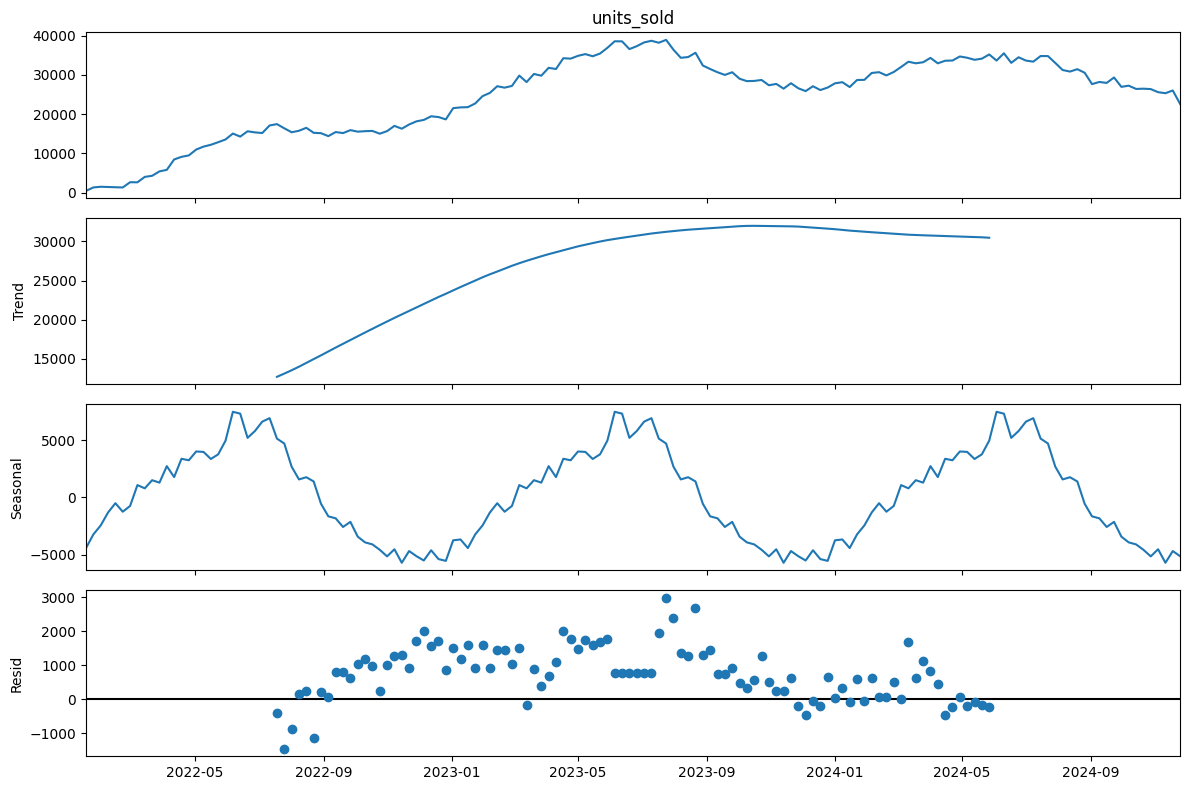

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Create week column (week start date)
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate weekly sales
weekly_sales = df.groupby('week')['units_sold'].sum().reset_index()

# Set week as index for time series
weekly_sales.set_index('week', inplace=True)

# Seasonal decomposition
# period=52 means we assume yearly seasonality (52 weeks in a year)
decomposition = seasonal_decompose(weekly_sales['units_sold'], model='additive', period=52)

# Plot decomposition
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.show()


In [ ]:
! pip install catboost

In [ ]:
df = df.drop(['delivered_qty', 'category', 'brand','sku'], axis=1)

0:	learn: 3901.9690143	total: 125ms	remaining: 1m 2s
100:	learn: 603.3516555	total: 759ms	remaining: 3s
200:	learn: 344.7063222	total: 1.2s	remaining: 1.78s
300:	learn: 199.6910551	total: 1.64s	remaining: 1.09s
400:	learn: 120.6721030	total: 2.13s	remaining: 526ms
499:	learn: 75.0725023	total: 2.47s	remaining: 0us


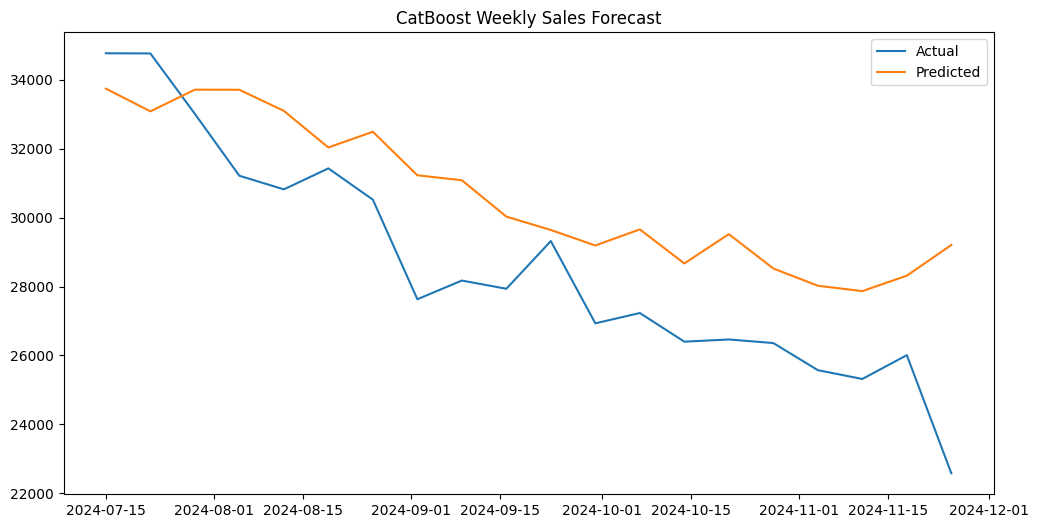

In [ ]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare features
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_sales = df.groupby('week')['units_sold'].sum().reset_index()

# Create lag features (important for time series ML models)
for lag in [1, 2, 3, 4, 12, 52]:  # 1,2,3,4 weeks and yearly lag
    weekly_sales[f'lag_{lag}'] = weekly_sales['units_sold'].shift(lag)

# Drop missing values caused by lags
weekly_sales = weekly_sales.dropna()

# Train/Test split
train, test = train_test_split(weekly_sales, test_size=0.2, shuffle=False)

# Features and target
X_train, y_train = train.drop(['units_sold'], axis=1), train['units_sold']
X_test, y_test = test.drop(['units_sold'], axis=1), test['units_sold']

# Initialize and train CatBoost
model = CatBoostRegressor(iterations=500, depth=8, learning_rate=0.05, loss_function='RMSE', verbose=100)
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(test['week'], y_test, label="Actual")
plt.plot(test['week'], preds, label="Predicted")
plt.legend()
plt.title("CatBoost Weekly Sales Forecast")
plt.show()


0:	learn: 1288.2169467	test: 3783.7816296	best: 3783.7816296 (0)	total: 15.5ms	remaining: 15.5s
200:	learn: 92.8022571	test: 2843.3917725	best: 2843.3917725 (200)	total: 188ms	remaining: 746ms
400:	learn: 7.4985861	test: 2778.4668409	best: 2778.4668409 (400)	total: 454ms	remaining: 678ms
600:	learn: 0.6058990	test: 2773.6993166	best: 2773.6993166 (600)	total: 619ms	remaining: 411ms
800:	learn: 0.0489577	test: 2773.2588938	best: 2773.2588938 (800)	total: 850ms	remaining: 211ms
999:	learn: 0.0040059	test: 2773.2187446	best: 2773.2187446 (999)	total: 1.03s	remaining: 0us

bestTest = 2773.218745
bestIteration = 999

0:	learn: 2095.9259127	test: 2887.8104932	best: 2887.8104932 (0)	total: 3.8ms	remaining: 3.79s
200:	learn: 117.4562195	test: 1297.5823163	best: 1297.5823163 (200)	total: 407ms	remaining: 1.62s
400:	learn: 9.4906698	test: 1234.9789181	best: 1234.9789181 (400)	total: 768ms	remaining: 1.15s
600:	learn: 0.7668629	test: 1230.0220292	best: 1230.0220292 (600)	total: 1.15s	remaining: 7

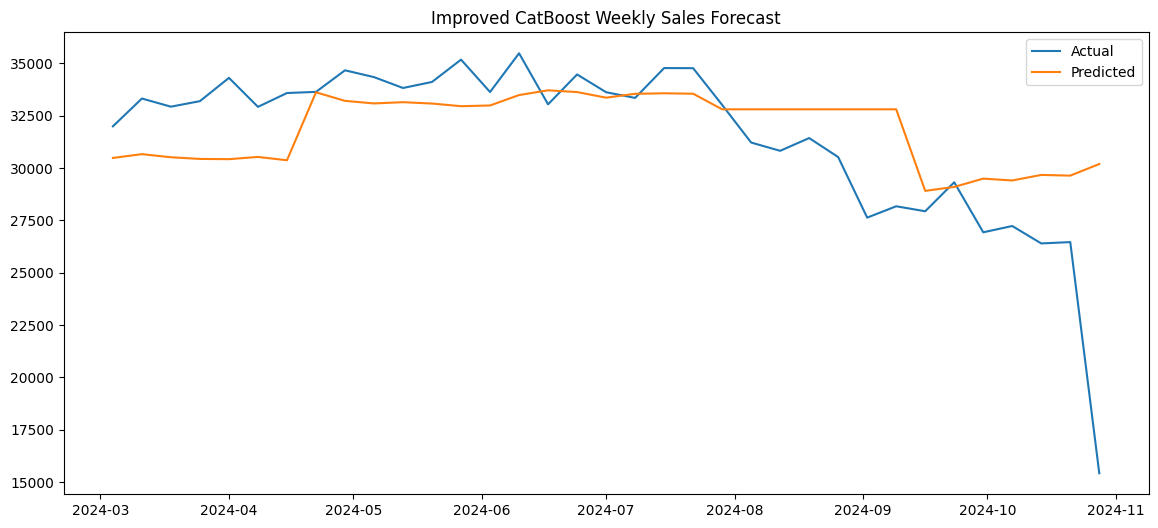

In [35]:

from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor

# ==============================
# Prepare Data
# ==============================
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate weekly sales
weekly_sales = df.groupby('week')['units_sold'].sum().reset_index()

# Create lag features
lags = [1, 2, 3, 4, 12, 26, 52, 104]
for lag in lags:
    weekly_sales[f'lag_{lag}'] = weekly_sales['units_sold'].shift(lag)

# Rolling statistics
for window in [4, 12]:
    weekly_sales[f'roll_mean_{window}'] = weekly_sales['units_sold'].shift(1).rolling(window).mean()
    weekly_sales[f'roll_std_{window}'] = weekly_sales['units_sold'].shift(1).rolling(window).std()

# Date-related features
weekly_sales['month'] = weekly_sales['week'].dt.month
weekly_sales['quarter'] = weekly_sales['week'].dt.quarter
weekly_sales['weekofyear'] = weekly_sales['week'].dt.isocalendar().week.astype(int)
weekly_sales['year'] = weekly_sales['week'].dt.year

# Drop NaN from lag/rolling
weekly_sales = weekly_sales.dropna().reset_index(drop=True)

# Features & Target
X = weekly_sales.drop(['units_sold'], axis=1)
y = weekly_sales['units_sold']

# ==============================
# TimeSeriesSplit Cross Validation
# ==============================
tscv = TimeSeriesSplit(n_splits=5)

preds_all = []
actual_all = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train CatBoost
    model = CatBoostRegressor(
        iterations=1000,
        depth=8,
        learning_rate=0.05,
        loss_function='RMSE',
        verbose=200,
        random_seed=42
    )
    model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

    preds = model.predict(X_test)
    preds_all.extend(preds)
    actual_all.extend(y_test)

# ==============================
# Plot Results
# ==============================
plt.figure(figsize=(14,6))
plt.plot(weekly_sales['week'].iloc[-len(actual_all):], actual_all, label="Actual")
plt.plot(weekly_sales['week'].iloc[-len(actual_all):], preds_all, label="Predicted")
plt.legend()
plt.title("Improved CatBoost Weekly Sales Forecast")
plt.show()
